<a href="https://colab.research.google.com/github/jieun0441/Stimulus-Payment/blob/main/SP_simulation_ver1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### data load & Setting

In [1]:
# For Colab Use
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Package loading
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [3]:
# data load for regression
data = pd.read_excel('/content/drive/MyDrive/SP/D_dong_Dataset_netcard영향14개구는 구별 가정으로포함.xlsx', sheet_name = "dong_wk20_35")

In [4]:
# data to calculate X vars
# SWMxinf_S
SWMxinf_S = pd.read_excel('/content/drive/MyDrive/SP/SWMxinf_from_Seoul.xlsx') # 유동인구 from Seoul to Seoul
# SWMxinf_NS
SWMxinf_NS = pd.read_excel('/content/drive/MyDrive/SP/SWMxinf_from_nonSeoul.xlsx') # 유동인구 from 비서울 to Seoul

# Card
Card_S = pd.read_excel('/content/drive/MyDrive/SP/netCard_from_Seoul.xlsx') # Card from Seoul to Seoul
Card_NS = pd.read_excel('/content/drive/MyDrive/SP/netCard_from_nonSeoul.xlsx') # Card from 비서울 to Seoul

In [ ]:
Card_S = pd.read_excel('/content/drive/MyDrive/SP/netCard_from_Seoul.xlsx') # Card from Seoul to Seoul

In [38]:
Card_NS = pd.read_excel('/content/drive/MyDrive/SP/netCard_from_nonSeoul.xlsx') # Card from 비서울 to Seoul

In [87]:
SWMxinf_S = pd.read_excel('/content/drive/MyDrive/SP/SWMxinf_from_Seoul.xlsx') # 유동인구 from Seoul to Seoul

In [84]:
SWMxinf_NS = pd.read_excel('/content/drive/MyDrive/SP/SWMxinf_from_nonSeoul.xlsx') # 유동인구 from 비서울 to Seoul

In [39]:
Card_NS.head()

,cat_origin,week,id_wk_orig,id_wk_dest,dest_dong_name,num_total,num_stmchk,avg_num_total,netCard,avg1017_orig_inf_per_100K,netCardxorig_inf,dest_inf,netCardxdest_inf,Ifdest_gu11,orig_inf
0,강원도,19,19강원도,19강남구대치4동,강남구대치4동,53,0,66.500,-13.500,0.210629,-1.749838,1.10283,-14.888201,0,0.129618
1,강원도,19,19강원도,19강남구도곡2동,강남구도곡2동,3607,0,3029.750,577.250,0.210629,74.821776,1.10283,636.608431,0,0.129618
2,강원도,19,19강원도,19강남구삼성1동,강남구삼성1동,104,0,31.375,72.625,0.210629,9.413480,1.10283,80.093005,0,0.129618
3,강원도,19,19강원도,19강남구삼성2동,강남구삼성2동,40,0,4.500,35.500,0.210629,4.601426,1.10283,39.150454,0,0.129618
4,강원도,19,19강원도,19강남구수서동,강남구수서동,3,0,0.000,3.000,0.210629,0.388853,1.10283,3.308489,0,0.129618


In [46]:
# population
population = pd.read_excel('/content/drive/MyDrive/SP/population_by_gu_dong.xlsx')

### OLS Regression with prepared data

In [6]:
# Adjust the decimal points of the X variables
data['signetCardxinf_m1wk_same_de4'] = data['signetCard_samexorig_inf_m1wk'] / 10000
data['sigSWM_m1wkxinf_m1wk_de6'] = data['sigSWM_m1wkxinf_m1wk'] / 1000000
data['signetCardxinf_m1wk_diff_de4'] = data['signetCard_diffxorig_infm1wk_fromKorea'] / 10000
data['Exposu_netCardxdestinf_wkm1_de3'] = data['Exposure_sum_netCardxdest_inf'] / 1000

# Define the list of gu values to filter
gu_values = ["강북구", "관악구", "노원구", "동대문구", "동작구", "양천구", "영등포구", "용산구", "은평구", "종로구", "중랑구"]

# Filter the data to include only rows where 'gu' is in gu_values
filtered_data = data[data['gu'].isin(gu_values)]

# Define the explanatory variables (X) and the dependent variable (y) using the filtered dataset
X = filtered_data[['Infm2wk_orig_assumption',
                   'sigSWM_m1wkxinf_m1wk_de6',
                   'signetCardxinf_m1wk_same_de4',
                   'signetCardxinf_m1wk_diff_de4',
                   'Exposu_netCardxdestinf_wkm1_de3']]
y = filtered_data['Inf_orig_assumption']

In [ ]:
# # Define the explanatory variables (X) and the dependent variable (y) using the whole dataset
# X = data[['Infm2wk_orig_assumption',
#           'sigSWM_m1wkxinf_m1wk',
#           'signetCard_samexorig_inf_m1wk',
#           'signetCard_diffxorig_infm1wk_fromKorea',
#           'Exposure_sum_netCardxdest_inf']]
# y = data['Inf_orig_assumption']

In [123]:
# Run the OLS regression model without intercept
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())

                                 OLS Regression Results                                 
Dep. Variable:     Inf_orig_assumption   R-squared (uncentered):                   0.267
Model:                             OLS   Adj. R-squared (uncentered):              0.265
Method:                  Least Squares   F-statistic:                              212.5
Date:                 Sat, 12 Oct 2024   Prob (F-statistic):                   8.78e-194
Time:                         13:08:58   Log-Likelihood:                         -8487.9
No. Observations:                 2928   AIC:                                  1.699e+04
Df Residuals:                     2923   BIC:                                  1.702e+04
Df Model:                            5                                                  
Covariance Type:             nonrobust                                                  
                                      coef    std err          t      P>|t|      [0.025      0.975]
----------

# With only Seoul

## Simulation 1-1 - with Geographic Restrictions

In [48]:
#@title Creating Simulation Result Table
weeks = range(20, 36)
dongs = data['dong'].unique() # 424개 동, 11개구 내 속한 동으로만 하려면 dongs = filtered_data['dong'].unique()로 해야함
predictions_df = pd.DataFrame(index=dongs, columns=[f"week_{week}" for week in weeks])

In [50]:
# Set 'dong' column as the index for population DataFrame
population.set_index('dong', inplace = True)

# Join the DataFrames
merged_df = predictions_df.join(population, how = 'inner')
predictions_df = merged_df
predictions_df.head(3)

,week_20,week_21,week_22,week_23,week_24,week_25,week_26,week_27,week_28,week_29,week_30,week_31,week_32,week_33,week_34,week_35,gu,population
송파구가락1동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,송파구,27876
송파구가락2동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,송파구,33204
송파구가락본동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,송파구,27368


In [51]:
# Function to fetch m2wk infection rates from 'data'
def get_m2wk_infection_rate(data, week, dong):
    # Generate the id for the target week
    target_id = f"{week}{dong}"

    # Filter the row with the corresponding id
    row = data[data['id'] == target_id]

    # Return the infection rate (Infm2wk_orig_assumption) if the row exists
    if not row.empty:
        return row['Infm2wk_orig_assumption'].values[0]
    else:
        return np.nan  # or any default value you prefer

In [52]:
#@title Iterate over each week to predict infection rates
for week in range(20, 36): # weeks = range(20, 36)
    # Create a DataFrame for the current week's prediction input
    df_input = pd.DataFrame(index=dongs) # 424개 동을 index로 갖는 데이터프레임 만듦
    df_input['week_dest'] = [f"{week}{dong}" for dong in df_input.index]
    df_input['m1wk_dest'] = [f"{week - 1}{dong}" for dong in df_input.index]

    # Calculate explanatory variables for the current week
    # 1) 2주 전 해당 지역의 감염률 관련변수: Add 'Infm2wk_orig_assumption'
    if week in [20, 21]:
       df_input['Infm2wk_orig_assumption'] = df_input.index.map(lambda dong: get_m2wk_infection_rate(data, week, dong))
    else:
       df_input['Infm2wk_orig_assumption'] = df_input.index.map(lambda dong: predictions_df.at[dong, f'week_{week - 2}'])

    # 2) 유동인구패턴 관련변수: Add sigSWM_m1wkxinf_m1wk_de6
        # (aggreated_df에서 'sigSWM_m1wkxinf_m1wk_de6'값 각각을 df_input의 week_dest가 일치하는 행에 찾아넣기)
    if week == 20: # 19주차에 해당하는 변수를 가져와야함
       # Group by the 'week_dest' column and sum the 'avg_SWMxinforig' values
       aggregated_SWM = SWMxinf_S.groupby('week_dest')['avg_SWMxinforig'].sum().reset_index()
    else: # if week >= 21
       # 구별 infections rate 계산: 동별 predicted values의 population 가중 평균
       # Merge predictions_df with population_data to get the population and gu
       merged_pop_inf = pd.merge(population, predictions_df[[f'week_{week - 1}']], left_on='dong', right_index=True)

       # Calculate total infections for each dong
       merged_pop_inf['infectionsxpopulation'] = merged_pop_inf[f'week_{week -1}'] * merged_pop_inf['population']

       # Aggregate total infections and population by gu
       gu_infections = merged_pop_inf.groupby('gu')['infectionsxpopulation'].sum().reset_index()
       gu_population = merged_pop_inf.groupby('gu')['population'].sum().reset_index()

       # Merge the total infections and population dataframes
       gu_merged = pd.merge(gu_infections, gu_population, on='gu')

       # Calculate the infection rate for each gu
       gu_merged['infection_rate'] = gu_merged['infectionsxpopulation'] / gu_merged['population']

       # Filter rows in SWMxinf_S where the week column matches the previous week value
       filtered_SWMxinf_S = SWMxinf_S[SWMxinf_S['week'] == (week - 1)]

       # Merge the filtered DataFrame with gu_merged based on 'orig_gu' and 'gu'
       merged_df = pd.merge(filtered_SWMxinf_S, gu_merged, left_on='orig_gu', right_on='gu', how='left')

       # Update the inforig column in the original SWMxinf_S DataFrame
       SWMxinf_S.loc[SWMxinf_S['week'] == (week-1), 'inforig'] = merged_df['infection_rate'].values

       # SWMxinf_S의 avg_SWMxinforig 계산(현재 week 해당분만)
       mask = SWMxinf_S['week'] == (week-1)
       SWMxinf_S.loc[mask, 'avg_SWMxinforig'] = SWMxinf_S.loc[mask, 'avg_flow_10to17'] * SWMxinf_S.loc[mask, 'inforig']

       # Group by the 'week_dest' and calculate sum the 'avg_SWMxinforig' values
       aggregated_SWM = SWMxinf_S.groupby('week_dest')['avg_SWMxinforig'].sum().reset_index()

    # Rename the column to reflect that it is an aggregated sum, if desired
    aggregated_SWM.rename(columns={'avg_SWMxinforig': 'sum_avg_SWMxinforig'}, inplace=True)

    aggregated_SWM['sigSWM_m1wkxinf_m1wk_de6'] = aggregated_SWM['sum_avg_SWMxinforig'] / 1000000

    df_input = pd.merge(df_input, aggregated_SWM[['week_dest','sigSWM_m1wkxinf_m1wk_de6']], how = 'left', left_on = 'm1wk_dest', right_on = 'week_dest')

   # 3) 같은 OD간 카드사용 변화 관련 변수: 'signetCardxinf_m1wk_same_de4'
    if week == 20: # 20주차 estimate 위한 변수로는 19주차에 해당하는 변수를 가져옴
       # sameOD_mask
       mask_sameOD = Card_S['orig_dong_name'] == Card_S['dest_dong_name']

       # sameOD netCardxorig_inf 계산
       Card_S.loc[mask_sameOD, 'netCardxorig_inf'] = Card_S.loc[mask_sameOD, 'netCard'] * Card_S.loc[mask_sameOD, 'orig_inf']

       # Group by the 'id_week_dest_dong' and calculate sum the 'netCard_samexinforig' values
       aggregated_Card_S_sameOD = Card_S[mask_sameOD].groupby('id_week_dest_dong')['netCardxorig_inf'].sum().reset_index()

    else: # this part not yet coded
       # Filter rows in netCardxinf where the week column matches the previous week value
       filtered_Card_S = Card_S[(Card_S['week'] == (week - 1))]
       # predictions_df에서 해당 주차의 감염률 데이터를 가져옴
       m1wk_column = f'week_{week - 1}'

       # Update the Card_S['orig_inf'] from the predictions_df dataframe's week_{week - 1} column
       # (orig_dong_name과 predictions_df의 index(동 이름)가 일치하는 행을 찾아 orig_inf 값을 업데이트)
       filtered_Card_S.loc[:, 'orig_inf'] = filtered_Card_S.apply(lambda row: predictions_df.loc[row['orig_dong_name'], m1wk_column]
                    if row['orig_dong_name'] in predictions_df.index else row['orig_inf'], axis=1)

       # Update netCardxorig_inf
       filtered_Card_S.loc[:, 'netCardxorig_inf'] = filtered_Card_S['netCard'] * filtered_Card_S['orig_inf']

       # sameOD_mask
       mask_sameOD_in_filtered = filtered_Card_S['orig_dong_name'] == filtered_Card_S['dest_dong_name']

       # aggregate netCardxorig_inf by destination dong
       aggregated_Card_S_sameOD = filtered_Card_S[mask_sameOD_in_filtered].groupby('id_week_dest_dong')['netCardxorig_inf'].sum().reset_index()

    # Rename the column to reflect that it is an aggregated sum
    aggregated_Card_S_sameOD.rename(columns={'netCardxorig_inf': 'signetCardxinf_same'}, inplace=True)
    # Create a decimal point adjusted-variable
    aggregated_Card_S_sameOD['signetCardxinf_same_de4'] = aggregated_Card_S_sameOD['signetCardxinf_same'] / 10000

    # merge signetCardxinf_same_de4 based on destination dong
    df_input = pd.merge(df_input, aggregated_Card_S_sameOD[['id_week_dest_dong', 'signetCardxinf_same_de4']],
                  left_on='m1wk_dest', right_on='id_week_dest_dong', how='left')
    df_input['signetCardxinf_same_de4'] = df_input['signetCardxinf_same_de4'].fillna(0)  # fillna with 0
    df_input['signetCardxinf_m1wk_same_de4'] = df_input['signetCardxinf_same_de4']
    df_input = df_input.drop(['id_week_dest_dong', 'signetCardxinf_same_de4'], axis=1)


   # 4) 다른 OD간 카드사용 변화 관련 변수1 (들어오는): 'signetCardxinf_m1wk_diff_de4'
    if week == 20:
      # diffOD_mask
       mask_diffOD = Card_S['orig_dong_name'] != Card_S['dest_dong_name']

      # diffOD netCardxorig_inf 계산
       Card_S.loc[mask_diffOD, 'netCardxorig_inf'] = (Card_S.loc[mask_diffOD, 'netCard'] * Card_S.loc[mask_diffOD, 'orig_inf'])

      # Group by the 'id_week_dest_dong' and calculate sum the 'netCard_diffxinforig' values
       aggregated_Card_S_diffOD = Card_S[mask_diffOD].groupby('id_week_dest_dong')['netCardxorig_inf'].sum().reset_index()

    else: # if week >= 21
       # diffOD_mask
       mask_diffOD_in_filtered = filtered_Card_S['orig_dong_name'] != filtered_Card_S['dest_dong_name']

       # aggregate netCardxorig_inf by destination dong
       aggregated_Card_S_diffOD = filtered_Card_S[mask_diffOD_in_filtered].groupby('id_week_dest_dong')['netCardxorig_inf'].sum().reset_index()

    # Rename the column to reflect that it is an aggregated sum
    aggregated_Card_S_diffOD.rename(columns={'netCardxorig_inf': 'signetCardxinf_diff'}, inplace=True)

    # Create a decimal point adjusted-variable
    aggregated_Card_S_diffOD['signetCardxinf_diff_de4'] = aggregated_Card_S_diffOD['signetCardxinf_diff'] / 10000

    # want to add 'signetCardxinf_m1wk_diff_de4' column in df_input dataframe according to m1wk_dest
    df_input = pd.merge(df_input, aggregated_Card_S_diffOD[['id_week_dest_dong', 'signetCardxinf_diff_de4']],
                  left_on='m1wk_dest', right_on='id_week_dest_dong', how='left')
    df_input['signetCardxinf_diff_de4'] = df_input['signetCardxinf_diff_de4'].fillna(0) # fillna with 0
    df_input['signetCardxinf_m1wk_diff_de4'] = df_input['signetCardxinf_diff_de4']
    df_input = df_input.drop(['id_week_dest_dong', 'signetCardxinf_diff_de4'], axis=1)


   # 5) 다른 OD간 카드사용 변화 관련 변수2 (나가는): 'Exposu_netCardxdestinf_wkm1_de3'
    if week == 20:
      # diffOD netCardxdest_inf 계산
      Card_S.loc[mask_diffOD, 'netCardxdest_inf'] = Card_S.loc[mask_diffOD, 'netCard'] * Card_S.loc[mask_diffOD, 'dest_inf']

      # Group by the 'id_week_orig_dong' and calculate sum of the 'netCard_diffxinfdest' values
      aggregated_Card_S_exposure = Card_S[mask_diffOD].groupby('id_week_orig_dong')['netCardxdest_inf'].sum().reset_index()
    else:
       # Update the Card_S['dest_inf'] from the predictions_df dataframe's week_{week - 1} column
       filtered_Card_S.loc[:, 'dest_inf'] = filtered_Card_S.apply(lambda row: predictions_df.loc[row['dest_dong_name'], m1wk_column]
                    if row['dest_dong_name'] in predictions_df.index else row['dest_inf'], axis=1)

       # Update netCardxdest_inf
       filtered_Card_S.loc[:, 'netCardxdest_inf'] = filtered_Card_S['netCard'] * filtered_Card_S['dest_inf']

       # aggregate netCardxorig_inf by destination dong
       aggregated_Card_S_exposure = filtered_Card_S[mask_diffOD_in_filtered].groupby('id_week_orig_dong')['netCardxdest_inf'].sum().reset_index()

    aggregated_Card_S_exposure.rename(columns = {'netCardxdest_inf': 'signetCardxdest_inf'}, inplace = True)
    aggregated_Card_S_exposure['signetCardxdest_inf_de3'] = aggregated_Card_S_exposure['signetCardxdest_inf']/1000

    df_input = pd.merge(df_input, aggregated_Card_S_exposure[['id_week_orig_dong', 'signetCardxdest_inf_de3']],
                  left_on = 'm1wk_dest', right_on = 'id_week_orig_dong', how = 'left')
    df_input['signetCardxdest_inf_de3'] = df_input['signetCardxdest_inf_de3'].fillna(0) # fillna with 0
    df_input['Exposu_netCardxdestinf_wkm1_de3'] = df_input['signetCardxdest_inf_de3']
    df_input = df_input.drop(['id_week_orig_dong', 'signetCardxdest_inf_de3'], axis = 1)

    # Save the current week's prediction input DataFrame to an Excel file
    df_input.to_excel(f'/content/drive/MyDrive/SP/input tables/df_input_ver1_week{week}.xlsx')

    # Predict the infection rates for the current week using the model
    X_input = df_input[['Infm2wk_orig_assumption',
                                  'sigSWM_m1wkxinf_m1wk_de6',
                                  'signetCardxinf_m1wk_same_de4',
                                  'signetCardxinf_m1wk_diff_de4',
                                  'Exposu_netCardxdestinf_wkm1_de3']]

    # Use the model to predict the infection rate
    y_pred = model.predict(X_input)

    # Replace negative values in y_pred with 0
    y_pred = np.where(y_pred < 0, 0, y_pred)

    # Replace NaN values with zero
    y_pred = np.nan_to_num(y_pred, nan=0.0)

    # Update the predictions DataFrame with the predicted values
    predictions_df[f'week_{week}'] = y_pred


In [45]:
predictions_df.head()

,week_20,week_21,week_22,week_23,week_24,week_25,week_26,week_27,week_28,week_29,week_30,week_31,week_32,week_33,week_34,week_35,gu,population
송파구가락1동,0.713043,0.451808,0.307212,0.216356,0.146595,0.101954,0.072614,0.050074,0.034839,0.023858,0.016697,0.011230,0.007133,0.005118,0.003701,0.002690,송파구,27876
송파구가락2동,1.135787,0.589708,0.423031,0.303071,0.219960,0.138461,0.100416,0.062524,0.046543,0.029900,0.021121,0.013473,0.009207,0.005806,0.003936,0.002720,송파구,33204
송파구가락본동,1.010740,0.736874,0.518097,0.377001,0.256206,0.178611,0.126780,0.081691,0.059563,0.040080,0.027360,0.018589,0.012576,0.008298,0.005435,0.003873,송파구,27368
구로구가리봉동,0.270650,0.217728,0.168335,0.144575,0.115573,0.089631,0.069462,0.054299,0.038432,0.029234,0.020520,0.015155,0.010847,0.007389,0.005069,0.003616,구로구,14263
금천구가산동,1.016545,1.102189,0.891799,0.769280,0.557327,0.424357,0.311298,0.221609,0.159890,0.109984,0.082324,0.052261,0.038370,0.025504,0.016017,0.012741,금천구,25973


In [44]:
Card_S.head()

,cat_origin,week,id_week_orig_dong,id_week_dest_dong,num_total,num_stmchk,avg_num_total,netCard,sameOD,orig_dong_name,...,dest_inf,netCardxdest_inf,Iforig_gu11,Ifdest_gu11,orig_dest,netCard_woR,netCard_woR2,netCard_woR3,netCard_woRxorig_inf,netCard_woRxdest_inf
0,서울,19,19강남구개포1동,19강남구개포1동,169,0,227.375,-58.375,1,강남구개포1동,...,1.10283,-64.377682,0,0,강남구개포1동_강남구개포1동,-58.375,-58.375,-58.375,-64.377682,NaN
1,서울,19,19강남구개포1동,19강남구개포2동,44,0,49.875,-5.875,0,강남구개포1동,...,1.10283,-6.479124,0,0,강남구개포1동_강남구개포2동,-5.875,-5.875,-5.875,-6.479124,-6.479124
2,서울,19,19강남구개포1동,19강남구개포4동,38,0,27.625,10.375,0,강남구개포1동,...,1.10283,11.441858,0,0,강남구개포1동_강남구개포4동,10.375,10.375,10.375,11.441858,11.441858
3,서울,19,19강남구개포1동,19강남구대치1동,27,0,9.500,17.500,0,강남구개포1동,...,1.10283,19.299519,0,0,강남구개포1동_강남구대치1동,17.500,17.500,17.500,19.299519,19.299519
4,서울,19,19강남구개포1동,19강남구대치4동,9,0,6.875,2.125,0,강남구개포1동,...,1.10283,2.343513,0,0,강남구개포1동_강남구대치4동,2.125,2.125,2.125,2.343513,2.343513


In [53]:
# Print the final predictions DataFrame
predictions_df.to_excel('/content/drive/MyDrive/SP/simulation results/predictions_with_Geographic Restrictions_ver1.xlsx', index=True)

# Create an empty dictionary to store aggregated results
results = {}

# Iterate through each week column
for week in range(20, 36):
    week_column = f'week_{week}'
    if week_column in predictions_df.columns:
        # Calculate population * week_X for each dong and sum up the values
        results[week_column] = (predictions_df['population'] * predictions_df[week_column]).sum()/100000

# Convert the results dictionary to a DataFrame
results_df_withR = pd.DataFrame(list(results.items()), columns=['Week', 'Sum of New Cases withR'])
results_df_withR

,Week,Sum of New Cases withR
0,week_20,85.244967
1,week_21,52.528325
2,week_22,73.210463
3,week_23,114.237084
4,week_24,84.004276
5,week_25,133.905234
6,week_26,164.163039
7,week_27,168.186195
8,week_28,198.405662
9,week_29,557.495204


## Simulation 1-2 - without Geographic Restrictions

In [54]:
#@title Creating Simulation Result Table
weeks = range(20, 36)
dongs = data['dong'].unique() # 424개 동, 11개구 내 속한 동으로만 하려면 dongs = filtered_data['dong'].unique()로 해야함
predictions_df_wo = pd.DataFrame(index=dongs, columns=[f"week_{week}" for week in weeks])

# Join the DataFrames
merged_df = predictions_df_wo.join(population, how = 'inner')
predictions_df_wo = merged_df
predictions_df_wo.head(3)

,week_20,week_21,week_22,week_23,week_24,week_25,week_26,week_27,week_28,week_29,week_30,week_31,week_32,week_33,week_34,week_35,gu,population
송파구가락1동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,송파구,27876
송파구가락2동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,송파구,33204
송파구가락본동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,송파구,27368


In [60]:
#@title Iterate over each week to predict infection rates w/o geographic restrictions
for week in range(20, 36): # weeks = range(20, 36)
    # Create a DataFrame for the current week's prediction input
    df_input = pd.DataFrame(index=dongs) # 424개 동을 index로 갖는 데이터프레임 만듦
    df_input['week_dest'] = [f"{week}{dong}" for dong in df_input.index]
    df_input['m1wk_dest'] = [f"{week - 1}{dong}" for dong in df_input.index]

    # Calculate explanatory variables for the current week
    # 1) 2주 전 해당 지역의 감염률 관련변수: Add 'Infm2wk_orig_assumption'
    if week in [20, 21]:
       df_input['Infm2wk_orig_assumption'] = df_input.index.map(lambda dong: get_m2wk_infection_rate(data, week, dong))
    else:
       df_input['Infm2wk_orig_assumption'] = df_input.index.map(lambda dong: predictions_df_wo.at[dong, f'week_{week - 2}'])

    # 2) 유동인구패턴 관련변수: Add sigSWM_m1wkxinf_m1wk_de6
        # (aggreated_df에서 'sigSWM_m1wkxinf_m1wk_de6'값 각각을 df_input의 week_dest가 일치하는 행에 찾아넣기)
    if week == 20: # 19주차에 해당하는 변수를 가져와야함
       # Group by the 'week_dest' column and sum the 'avg_SWMxinforig' values
       aggregated_SWM = SWMxinf_S.groupby('week_dest')['avg_SWMxinforig'].sum().reset_index()
    else: # if week >= 21
       # 구별 infections rate 계산: 동별 predicted values의 population 가중 평균
       # Merge predictions_df_wo with population_data to get the population and gu
       merged_pop_inf = pd.merge(population, predictions_df_wo[[f'week_{week - 1}']], left_on='dong', right_index=True)

       # Calculate total infections for each dong
       merged_pop_inf['infectionsxpopulation'] = merged_pop_inf[f'week_{week -1}'] * merged_pop_inf['population']

       # Aggregate total infections and population by gu
       gu_infections = merged_pop_inf.groupby('gu')['infectionsxpopulation'].sum().reset_index()
       gu_population = merged_pop_inf.groupby('gu')['population'].sum().reset_index()

       # Merge the total infections and population dataframes
       gu_merged = pd.merge(gu_infections, gu_population, on='gu')

       # Calculate the infection rate for each gu
       gu_merged['infection_rate'] = gu_merged['infectionsxpopulation'] / gu_merged['population']

       # Filter rows in SWMxinf_S where the week column matches the previous week value
       filtered_SWMxinf_S = SWMxinf_S[SWMxinf_S['week'] == (week - 1)]

       # Merge the filtered DataFrame with gu_merged based on 'orig_gu' and 'gu'
       merged_df = pd.merge(filtered_SWMxinf_S, gu_merged, left_on='orig_gu', right_on='gu', how='left')

       # Update the inforig column in the original SWMxinf_S DataFrame
       SWMxinf_S.loc[SWMxinf_S['week'] == (week-1), 'inforig'] = merged_df['infection_rate'].values

       # SWMxinf_S의 avg_SWMxinforig 계산(현재 week 해당분만)
       mask = SWMxinf_S['week'] == (week-1)
       SWMxinf_S.loc[mask, 'avg_SWMxinforig'] = SWMxinf_S.loc[mask, 'avg_flow_10to17'] * SWMxinf_S.loc[mask, 'inforig']

       # Group by the 'week_dest' and calculate sum the 'avg_SWMxinforig' values
       aggregated_SWM = SWMxinf_S.groupby('week_dest')['avg_SWMxinforig'].sum().reset_index()

    # Rename the column to reflect that it is an aggregated sum, if desired
    aggregated_SWM.rename(columns={'avg_SWMxinforig': 'sum_avg_SWMxinforig'}, inplace=True)

    aggregated_SWM['sigSWM_m1wkxinf_m1wk_de6'] = aggregated_SWM['sum_avg_SWMxinforig'] / 1000000

    df_input = pd.merge(df_input, aggregated_SWM[['week_dest','sigSWM_m1wkxinf_m1wk_de6']], how = 'left', left_on = 'm1wk_dest', right_on = 'week_dest')

   # 3) 같은 OD간 카드사용 변화 관련 변수: 'signetCardxinf_m1wk_same_de4'
    if week == 20: # 20주차 estimate 위한 변수로는 19주차에 해당하는 변수를 가져옴
       # sameOD_mask
       mask_sameOD = Card_S['orig_dong_name'] == Card_S['dest_dong_name']

       # sameOD netCardxorig_inf 계산
       Card_S.loc[mask_sameOD, 'netCard_woRxorig_inf'] = Card_S.loc[mask_sameOD, 'netCard_woR'] * Card_S.loc[mask_sameOD, 'orig_inf']

       # Group by the 'id_week_dest_dong' and calculate sum the 'netCard_samexinforig' values
       aggregated_Card_S_sameOD = Card_S[mask_sameOD].groupby('id_week_dest_dong')['netCard_woRxorig_inf'].sum().reset_index()

    else: # this part not yet coded
       # Filter rows in netCardxinf where the week column matches the previous week value
       filtered_Card_S = Card_S[(Card_S['week'] == (week - 1))]
       # predictions_df_wo에서 해당 주차의 감염률 데이터를 가져옴
       m1wk_column = f'week_{week - 1}'

       # Update the Card_S['orig_inf'] from the predictions_df_wo dataframe's week_{week - 1} column
       # (orig_dong_name과 predictions_df_wo의 index(동 이름)가 일치하는 행을 찾아 orig_inf 값을 업데이트)
       filtered_Card_S.loc[:, 'orig_inf'] = filtered_Card_S.apply(lambda row: predictions_df_wo.loc[row['orig_dong_name'], m1wk_column]
                    if row['orig_dong_name'] in predictions_df_wo.index else row['orig_inf'], axis=1)

       # Update netCardxorig_inf
       filtered_Card_S.loc[:, 'netCard_woRxorig_inf'] = filtered_Card_S['netCard_woR'] * filtered_Card_S['orig_inf']

       # sameOD_mask
       mask_sameOD_in_filtered = filtered_Card_S['orig_dong_name'] == filtered_Card_S['dest_dong_name']

       # aggregate netCardxorig_inf by destination dong
       aggregated_Card_S_sameOD = filtered_Card_S[mask_sameOD_in_filtered].groupby('id_week_dest_dong')['netCard_woRxorig_inf'].sum().reset_index()

    # Rename the column to reflect that it is an aggregated sum
    aggregated_Card_S_sameOD.rename(columns={'netCard_woRxorig_inf': 'signetCardxinf_same'}, inplace=True)
    # Create a decimal point adjusted-variable
    aggregated_Card_S_sameOD['signetCardxinf_same_de4'] = aggregated_Card_S_sameOD['signetCardxinf_same'] / 10000

    # merge signetCardxinf_same_de4 based on destination dong
    df_input = pd.merge(df_input, aggregated_Card_S_sameOD[['id_week_dest_dong', 'signetCardxinf_same_de4']],
                  left_on='m1wk_dest', right_on='id_week_dest_dong', how='left')
    df_input['signetCardxinf_same_de4'] = df_input['signetCardxinf_same_de4'].fillna(0)  # fillna with 0
    df_input['signetCardxinf_m1wk_same_de4'] = df_input['signetCardxinf_same_de4']
    df_input = df_input.drop(['id_week_dest_dong', 'signetCardxinf_same_de4'], axis=1)


   # 4) 다른 OD간 카드사용 변화 관련 변수1 (들어오는): 'signetCardxinf_m1wk_diff_de4'
    if week == 20:
      # diffOD_mask
       mask_diffOD = Card_S['orig_dong_name'] != Card_S['dest_dong_name']

      # diffOD netCardxorig_inf 계산
       Card_S.loc[mask_diffOD, 'netCard_woRxorig_inf'] = (Card_S.loc[mask_diffOD, 'netCard_woR'] * Card_S.loc[mask_diffOD, 'orig_inf'])

      # Group by the 'id_week_dest_dong' and calculate sum the 'netCard_woR_diffxinforig' values
       aggregated_Card_S_diffOD = Card_S[mask_diffOD].groupby('id_week_dest_dong')['netCard_woRxorig_inf'].sum().reset_index()

    else: # if week >= 21
       # diffOD_mask
       mask_diffOD_in_filtered = filtered_Card_S['orig_dong_name'] != filtered_Card_S['dest_dong_name']

       # aggregate netCard_woRxorig_inf by destination dong
       aggregated_Card_S_diffOD = filtered_Card_S[mask_diffOD_in_filtered].groupby('id_week_dest_dong')['netCard_woRxorig_inf'].sum().reset_index()

    # Rename the column to reflect that it is an aggregated sum
    aggregated_Card_S_diffOD.rename(columns={'netCard_woRxorig_inf': 'signetCardxinf_diff'}, inplace=True)

    # Create a decimal point adjusted-variable
    aggregated_Card_S_diffOD['signetCardxinf_diff_de4'] = aggregated_Card_S_diffOD['signetCardxinf_diff'] / 10000

    # want to add 'signetCardxinf_m1wk_diff_de4' column in df_input dataframe according to m1wk_dest
    df_input = pd.merge(df_input, aggregated_Card_S_diffOD[['id_week_dest_dong', 'signetCardxinf_diff_de4']],
                  left_on='m1wk_dest', right_on='id_week_dest_dong', how='left')
    df_input['signetCardxinf_diff_de4'] = df_input['signetCardxinf_diff_de4'].fillna(0) # fillna with 0
    df_input['signetCardxinf_m1wk_diff_de4'] = df_input['signetCardxinf_diff_de4']
    df_input = df_input.drop(['id_week_dest_dong', 'signetCardxinf_diff_de4'], axis=1)


   # 5) 다른 OD간 카드사용 변화 관련 변수2 (나가는): 'Exposu_netCardxdestinf_wkm1_de3'
    if week == 20:
      # diffOD netCardxdest_inf 계산
      Card_S.loc[mask_diffOD, 'netCard_woRxdest_inf'] = Card_S.loc[mask_diffOD, 'netCard_woR'] * Card_S.loc[mask_diffOD, 'dest_inf']

      # Group by the 'id_week_orig_dong' and calculate sum of the 'netCard_woR_diffxinfdest' values
      aggregated_Card_S_exposure = Card_S[mask_diffOD].groupby('id_week_orig_dong')['netCard_woRxdest_inf'].sum().reset_index()
    else:
       # Update the Card_S['dest_inf'] from the predictions_df_wo dataframe's week_{week - 1} column
       filtered_Card_S.loc[:, 'dest_inf'] = filtered_Card_S.apply(lambda row: predictions_df_wo.loc[row['dest_dong_name'], m1wk_column]
                    if row['dest_dong_name'] in predictions_df_wo.index else row['dest_inf'], axis=1)

       # Update netCard_woRxdest_inf
       filtered_Card_S.loc[:, 'netCard_woRxdest_inf'] = filtered_Card_S['netCard_woR'] * filtered_Card_S['dest_inf']

       # aggregate netCard_woRxorig_inf by destination dong
       aggregated_Card_S_exposure = filtered_Card_S[mask_diffOD_in_filtered].groupby('id_week_orig_dong')['netCard_woRxdest_inf'].sum().reset_index()

    aggregated_Card_S_exposure.rename(columns = {'netCard_woRxdest_inf': 'signetCardxdest_inf'}, inplace = True)
    aggregated_Card_S_exposure['signetCardxdest_inf_de3'] = aggregated_Card_S_exposure['signetCardxdest_inf']/1000

    df_input = pd.merge(df_input, aggregated_Card_S_exposure[['id_week_orig_dong', 'signetCardxdest_inf_de3']],
                  left_on = 'm1wk_dest', right_on = 'id_week_orig_dong', how = 'left')
    df_input['signetCardxdest_inf_de3'] = df_input['signetCardxdest_inf_de3'].fillna(0) # fillna with 0
    df_input['Exposu_netCardxdestinf_wkm1_de3'] = df_input['signetCardxdest_inf_de3']
    df_input = df_input.drop(['id_week_orig_dong', 'signetCardxdest_inf_de3'], axis = 1)

    # Save the current week's prediction input DataFrame to an Excel file
    df_input.to_excel(f'/content/drive/MyDrive/SP/input tables_woR/df_input_ver1_week{week}.xlsx')

    # Predict the infection rates for the current week using the model
    X_input = df_input[['Infm2wk_orig_assumption',
                                  'sigSWM_m1wkxinf_m1wk_de6',
                                  'signetCardxinf_m1wk_same_de4',
                                  'signetCardxinf_m1wk_diff_de4',
                                  'Exposu_netCardxdestinf_wkm1_de3']]

    # Use the model to predict the infection rate
    y_pred = model.predict(X_input)

    # Replace negative values in y_pred with 0
    y_pred = np.where(y_pred < 0, 0, y_pred)

    # Replace NaN values with zero
    y_pred = np.nan_to_num(y_pred, nan=0.0)

    # Update the predictions DataFrame with the predicted values
    predictions_df_wo[f'week_{week}'] = y_pred


In [61]:
# Print the final predictions DataFrame
predictions_df_wo.to_excel('/content/drive/MyDrive/SP/simulation results/predictions_without_Geographic Restrictions_ver1.xlsx', index=True)

# Create an empty dictionary to store aggregated results
results = {}

# Iterate through each week column
for week in range(20, 36):
    week_column = f'week_{week}'
    if week_column in predictions_df_wo.columns:
        # Calculate population * week_X for each dong and sum up the values
        results[week_column] = (predictions_df_wo['population'] * predictions_df_wo[week_column]).sum()/100000

# Convert the results dictionary to a DataFrame
results_df_woR = pd.DataFrame(list(results.items()), columns=['Week', 'Sum of New Cases woR'])
results_df_woR

,Week,Sum of New Cases woR
0,week_20,85.244967
1,week_21,74.735072
2,week_22,65.033205
3,week_23,103.161353
4,week_24,86.692385
5,week_25,120.320731
6,week_26,125.576279
7,week_27,97.293157
8,week_28,116.390856
9,week_29,144.564196


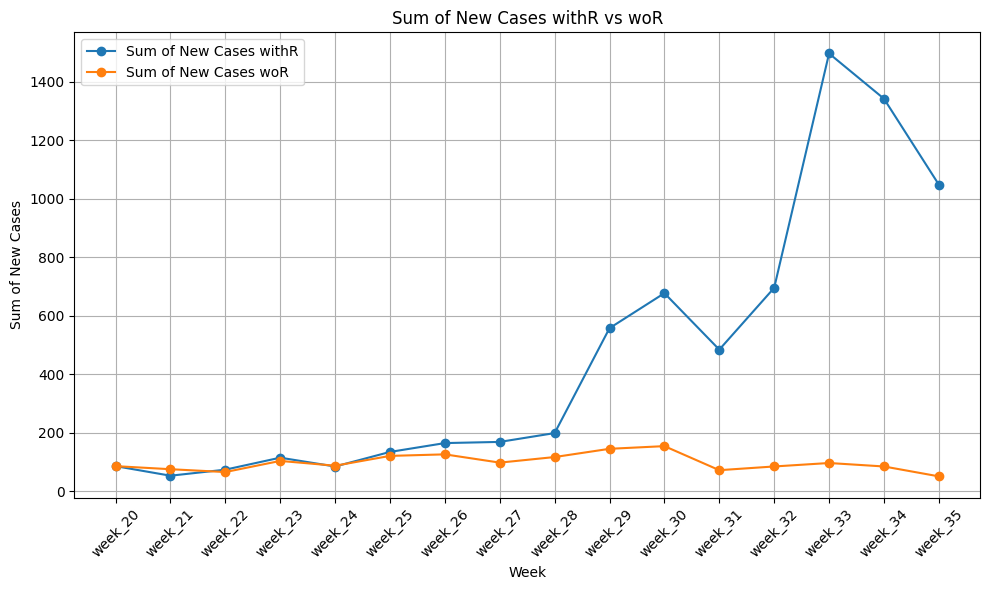

In [62]:
#@title graph
import matplotlib.pyplot as plt

# combining results_df
# Merge the two dataframes on the 'Week' column
merged_df = pd.merge(results_df_withR, results_df_woR, on='Week')
merged_df.to_excel('/content/drive/MyDrive/SP/simulation results/Simulation results_by_week_ver1_241012.xlsx', index=True)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(merged_df['Week'], merged_df['Sum of New Cases withR'], marker='o', linestyle='-', label='Sum of New Cases withR')
plt.plot(merged_df['Week'], merged_df['Sum of New Cases woR'], marker='o', linestyle='-', label='Sum of New Cases woR')

plt.xlabel('Week')
plt.ylabel('Sum of New Cases')
plt.title('Sum of New Cases withR vs woR')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

In [63]:
merged_df

,Week,Sum of New Cases withR,Sum of New Cases woR
0,week_20,85.244967,85.244967
1,week_21,52.528325,74.735072
2,week_22,73.210463,65.033205
3,week_23,114.237084,103.161353
4,week_24,84.004276,86.692385
5,week_25,133.905234,120.320731
6,week_26,164.163039,125.576279
7,week_27,168.186195,97.293157
8,week_28,198.405662,116.390856
9,week_29,557.495204,144.564196


In [64]:
# Calculate the sum of each column
sum_withR = merged_df['Sum of New Cases withR'].sum()
sum_woR = merged_df['Sum of New Cases woR'].sum()

# Calculate the percentage difference
percentage_difference = ((sum_woR - sum_withR) / sum_withR) * 100

# Print the results
print(f"Sum of 'Sum of New Cases withR': {sum_withR}")
print(f"Sum of 'Sum of New Cases woR': {sum_woR}")
print(f"Percentage difference: {percentage_difference:.2f}%")

Sum of 'Sum of New Cases withR': 7377.259881240099
Sum of 'Sum of New Cases woR': 1558.698136893162
Percentage difference: -78.87%


# Including non-Seoul

## Simulation 2-1 - with Geographic Restrictions

In [99]:
#@title Creating Simulation Result Table
weeks = range(20, 36)
dongs = data['dong'].unique() # 424개 동, 11개구 내 속한 동으로만 하려면 dongs = filtered_data['dong'].unique()로 해야함
predictions_df2_1 = pd.DataFrame(index=dongs, columns=[f"week_{week}" for week in weeks])

In [102]:
# Set 'dong' column as the index for population DataFrame
# population.set_index('dong', inplace = True)

# Join the DataFrames
merged_df = predictions_df2_1.join(population, how = 'inner')
predictions_df2_1 = merged_df
predictions_df2_1.head(3)

,week_20,week_21,week_22,week_23,week_24,week_25,week_26,week_27,week_28,week_29,week_30,week_31,week_32,week_33,week_34,week_35,gu,population
송파구가락1동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,송파구,27876
송파구가락2동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,송파구,33204
송파구가락본동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,송파구,27368


In [104]:
# Function to fetch m2wk infection rates from 'data'
def get_sigSWM_m1wkxinf_m1wk_de6(data, week, dong):
    # Generate the id for the target week
    target_id = f"{week}{dong}"

    # Filter the row with the corresponding id
    row = data[data['id'] == target_id]

    # Return the sigSWM_m1wkxinf_m1wk_de6 if the row exists
    if not row.empty:
        return row['sigSWM_m1wkxinf_m1wk_de6'].values[0]
    else:
        return np.nan  # or any default value you prefer

In [133]:
#@title Iterate over each week to predict infection rates
for week in range(20, 36): # weeks = range(20, 36)
    # Create a DataFrame for the current week's prediction input
    df_input = pd.DataFrame(index=dongs) # 424개 동을 index로 갖는 데이터프레임 만듦
    df_input['week_dest'] = [f"{week}{dong}" for dong in df_input.index]
    df_input['m1wk_dest'] = [f"{week - 1}{dong}" for dong in df_input.index]

    # Calculate explanatory variables for the current week
    # 1) 2주 전 해당 지역의 감염률 관련변수: Add 'Infm2wk_orig_assumption'
    if week in [20, 21]:
       df_input['Infm2wk_orig_assumption'] = df_input.index.map(lambda dong: get_m2wk_infection_rate(data, week, dong))
    else:
       df_input['Infm2wk_orig_assumption'] = df_input.index.map(lambda dong: predictions_df2_1.at[dong, f'week_{week - 2}'])

    # 2) 유동인구패턴 관련변수: Add sigSWM_m1wkxinf_m1wk_de6
        # (aggreated_df에서 'sigSWM_m1wkxinf_m1wk_de6'값 각각을 df_input의 week_dest가 일치하는 행에 찾아넣기)
    if week == 20: # 19주차에 해당하는 변수를 가져와야함
       df_input['sigSWM_m1wkxinf_m1wk_de6'] = df_input.index.map(lambda dong: get_sigSWM_m1wkxinf_m1wk_de6(data, week, dong))

    else: # if week >= 21
       # 구별 infections rate 계산: 동별 predicted values의 population 가중 평균
       # Merge predictions_df with population_data to get the population and gu
       merged_pop_inf = pd.merge(population, predictions_df[[f'week_{week - 1}']], left_on='dong', right_index=True)

       # Calculate total infections for each dong
       merged_pop_inf['infectionsxpopulation'] = merged_pop_inf[f'week_{week -1}'] * merged_pop_inf['population']

       # Aggregate total infections and population by gu
       gu_infections = merged_pop_inf.groupby('gu')['infectionsxpopulation'].sum().reset_index()
       gu_population = merged_pop_inf.groupby('gu')['population'].sum().reset_index()

       # Merge the total infections and population dataframes
       gu_merged = pd.merge(gu_infections, gu_population, on='gu')

       # Calculate the infection rate for each gu
       gu_merged['infection_rate'] = gu_merged['infectionsxpopulation'] / gu_merged['population']

       # Filter rows in SWMxinf_S where the week column matches the previous week value
       mask_S = SWMxinf_S['week'] == (week-1)
       mask_NS = SWMxinf_NS['week'] == (week-1)

       filtered_SWMxinf_S = SWMxinf_S[mask_S]
       filtered_SWMxinf_NS = SWMxinf_NS[mask_NS]

       # Merge the filtered DataFrame with gu_merged based on 'orig_gu' and 'gu'
       merged_df_filtered_SWMxinf_S = pd.merge(filtered_SWMxinf_S, gu_merged, left_on='orig_gu', right_on='gu', how='left')
       merged_df_filtered_SWMxinf_NS = pd.merge(filtered_SWMxinf_NS, gu_merged, left_on = 'orig_gu', right_on = 'gu', how = 'left')

       # Update the inforig column in the original SWMxinf_S and SWMxinf_NS DataFrame
       SWMxinf_S.loc[mask_S, 'inforig'] = merged_df_filtered_SWMxinf_S['infection_rate'].values
       SWMxinf_NS.loc[mask_NS, 'inforig'] = merged_df_filtered_SWMxinf_NS['infection_rate'].values

       # SWMxinf_S의 avg_SWMxinforig 계산(현재 week 해당분만)

       SWMxinf_S.loc[mask_S, 'avg_SWMxinforig'] = SWMxinf_S.loc[mask_S, 'avg_flow_10to17'] * SWMxinf_S.loc[mask_S, 'inforig']
       SWMxinf_NS.loc[mask_NS, 'avg_SWMxinforig'] = SWMxinf_NS.loc[mask_NS, 'avg_flow_10to17'] * SWMxinf_NS.loc[mask_NS, 'inforig']

       # Group by the 'week_dest' and calculate sum the 'avg_SWMxinforig' values
       aggregated_SWM_S = SWMxinf_S.groupby('week_dest')['avg_SWMxinforig'].sum().reset_index()
       aggregated_SWM_NS = SWMxinf_NS.groupby('week_dest')['avg_SWMxinforig'].sum().reset_index()

       # Rename the column to reflect that it is an aggregated sum, if desired
       aggregated_SWM = pd.merge(aggregated_SWM_S, aggregated_SWM_NS[['week_dest', 'avg_SWMxinforig']], left_on = 'week_dest',right_on = 'week_dest', suffixes=('_S', '_NS'), how = 'left')
       aggregated_SWM['avg_SWMxinforig'] = aggregated_SWM['avg_SWMxinforig_S'] + aggregated_SWM['avg_SWMxinforig_NS']
       aggregated_SWM.rename(columns={'avg_SWMxinforig': 'sum_avg_SWMxinforig'}, inplace=True)
       aggregated_SWM['sigSWM_m1wkxinf_m1wk_de6'] = aggregated_SWM['sum_avg_SWMxinforig'] / 1000000

       df_input = pd.merge(df_input, aggregated_SWM[['week_dest','sigSWM_m1wkxinf_m1wk_de6']], left_on = 'm1wk_dest', right_on = 'week_dest', how = 'left')
       df_input.rename(columns = {'week_dest_x':'week_dest'}, inplace = True)
       df_input = df_input.drop(['week_dest_y'], axis = 1)

   # 3) 같은 OD간 카드사용 변화 관련 변수: 'signetCardxinf_m1wk_same_de4'
    if week == 20: # 20주차 estimate 위한 변수로는 19주차에 해당하는 변수를 가져옴
       # sameOD_mask
       mask_sameOD = Card_S['orig_dong_name'] == Card_S['dest_dong_name']

       # sameOD netCardxorig_inf 계산
       Card_S.loc[mask_sameOD, 'netCardxorig_inf'] = Card_S.loc[mask_sameOD, 'netCard'] * Card_S.loc[mask_sameOD, 'orig_inf']

       # Group by the 'id_week_dest_dong' and calculate sum the 'netCard_samexinforig' values
       aggregated_Card_S_sameOD = Card_S[mask_sameOD].groupby('id_week_dest_dong')['netCardxorig_inf'].sum().reset_index()

    else:
       # Filter rows in netCardxinf where the week column matches the previous week value
       filtered_Card_S = Card_S[(Card_S['week'] == (week - 1))]
       # predictions_df2_1에서 해당 주차의 감염률 데이터를 가져옴
       m1wk_column = f'week_{week - 1}'

       # Update the Card_S['orig_inf'] from the predictions_df2_1 dataframe's week_{week - 1} column
       # (orig_dong_name과 predictions_df2_1의 index(동 이름)가 일치하는 행을 찾아 orig_inf 값을 업데이트)
       filtered_Card_S.loc[:, 'orig_inf'] = filtered_Card_S.apply(lambda row: predictions_df2_1.loc[row['orig_dong_name'], m1wk_column]
                    if row['orig_dong_name'] in predictions_df2_1.index else row['orig_inf'], axis=1)

       # Update netCardxorig_inf
       filtered_Card_S.loc[:, 'netCardxorig_inf'] = filtered_Card_S['netCard'] * filtered_Card_S['orig_inf']

       # sameOD_mask
       mask_sameOD_in_filtered = filtered_Card_S['orig_dong_name'] == filtered_Card_S['dest_dong_name']

       # aggregate netCardxorig_inf by destination dong
       aggregated_Card_S_sameOD = filtered_Card_S[mask_sameOD_in_filtered].groupby('id_week_dest_dong')['netCardxorig_inf'].sum().reset_index()

    # Rename the column to reflect that it is an aggregated sum
    aggregated_Card_S_sameOD.rename(columns={'netCardxorig_inf': 'signetCardxinf_same'}, inplace=True)
    # Create a decimal point adjusted-variable
    aggregated_Card_S_sameOD['signetCardxinf_same_de4'] = aggregated_Card_S_sameOD['signetCardxinf_same'] / 10000

    # merge signetCardxinf_same_de4 based on destination dong
    df_input = pd.merge(df_input, aggregated_Card_S_sameOD[['id_week_dest_dong', 'signetCardxinf_same_de4']],
                  left_on='m1wk_dest', right_on='id_week_dest_dong', how='left')
    # Fill NaN values in 'signetCardxinf_same_de4' column with 0
    df_input['signetCardxinf_same_de4'] = df_input['signetCardxinf_same_de4'].fillna(0)  # fillna with 0
    df_input['signetCardxinf_m1wk_same_de4'] = df_input['signetCardxinf_same_de4']
    df_input = df_input.drop(['id_week_dest_dong', 'signetCardxinf_same_de4'], axis=1)

   # 4) 다른 OD간 카드사용 변화 관련 변수1 (들어오는): 'signetCardxinf_m1wk_diff_de4'
    if week == 20:
      # diffOD_mask
       mask_diffOD = Card_S['orig_dong_name'] != Card_S['dest_dong_name']

      # diffOD netCardxorig_inf 계산
       Card_S.loc[mask_diffOD, 'netCardxorig_inf'] = Card_S.loc[mask_diffOD, 'netCard'] * Card_S.loc[mask_diffOD, 'orig_inf']

      # Group by the 'id_week_dest_dong' and calculate sum the 'netCard_diffxinforig' values
       aggregated_Card_S_diffOD = Card_S[mask_diffOD].groupby('id_week_dest_dong')['netCardxorig_inf'].sum().reset_index()
       aggregated_Card_NS_diffOD = Card_NS.groupby('id_wk_dest')['netCardxorig_inf'].sum().reset_index()
       # Merge diffOD from Seoul and Non-Seoul
       aggregated_Card_diffOD = pd.merge(aggregated_Card_S_diffOD, aggregated_Card_NS_diffOD, left_on= 'id_week_dest_dong', right_on = 'id_wk_dest', suffixes=('_S', '_NS'), how = 'left')
       aggregated_Card_diffOD = aggregated_Card_diffOD.fillna(0) # fillna with 0
       aggregated_Card_diffOD['netCardxorig_inf'] = aggregated_Card_diffOD['netCardxorig_inf_S'] + aggregated_Card_diffOD['netCardxorig_inf_NS']

    else: # if week >= 21
       # diffOD_mask
       mask_diffOD_in_filtered = filtered_Card_S['orig_dong_name'] != filtered_Card_S['dest_dong_name']
       # aggregate netCardxorig_inf by destination dong
       aggregated_Card_S_diffOD = filtered_Card_S[mask_diffOD_in_filtered].groupby('id_week_dest_dong')['netCardxorig_inf'].sum().reset_index()
       aggregated_Card_NS_diffOD = Card_NS.groupby('id_wk_dest')['netCardxorig_inf'].sum().reset_index()

    # Merge diffOD from Seoul and Non-Seoul
    aggregated_Card_diffOD = pd.merge(aggregated_Card_S_diffOD, aggregated_Card_NS_diffOD, left_on= 'id_week_dest_dong', right_on = 'id_wk_dest', suffixes=('_S', '_NS'), how = 'left')
    aggregated_Card_diffOD = aggregated_Card_diffOD.fillna(0) # fillna with 0
    aggregated_Card_diffOD['netCardxorig_inf'] = aggregated_Card_diffOD['netCardxorig_inf_S'] + aggregated_Card_diffOD['netCardxorig_inf_NS']

    # Rename the column to reflect that it is an aggregated sum
    aggregated_Card_diffOD.rename(columns={'netCardxorig_inf': 'signetCardxinf_diff'}, inplace=True)

    # Create a decimal point adjusted-variable
    aggregated_Card_diffOD['signetCardxinf_diff_de4'] = aggregated_Card_diffOD['signetCardxinf_diff'] / 10000

    # want to add 'signetCardxinf_m1wk_diff_de4' column in df_input dataframe according to m1wk_dest
    df_input = pd.merge(df_input, aggregated_Card_diffOD[['id_week_dest_dong', 'signetCardxinf_diff_de4']],
                  left_on='m1wk_dest', right_on='id_week_dest_dong', how='left')
    df_input['signetCardxinf_diff_de4'] = df_input['signetCardxinf_diff_de4'].fillna(0) # fillna with 0
    df_input['signetCardxinf_m1wk_diff_de4'] = df_input['signetCardxinf_diff_de4']
    df_input = df_input.drop(['id_week_dest_dong', 'signetCardxinf_diff_de4'], axis=1)

   # 5) 다른 OD간 카드사용 변화 관련 변수2 (나가는): 'Exposu_netCardxdestinf_wkm1_de3'
    if week == 20:
      # diffOD netCardxdest_inf 계산
      Card_S.loc[mask_diffOD, 'netCardxdest_inf'] = Card_S.loc[mask_diffOD, 'netCard'] * Card_S.loc[mask_diffOD, 'dest_inf']

      # Group by the 'id_week_orig_dong' and calculate sum of the 'netCard_diffxinfdest' values
      aggregated_Card_S_exposure = Card_S[mask_diffOD].groupby('id_week_orig_dong')['netCardxdest_inf'].sum().reset_index()

    else:
       # Update the Card_S['dest_inf'] from the predictions_df2_1 dataframe's week_{week - 1} column
       filtered_Card_S.loc[:, 'dest_inf'] = filtered_Card_S.apply(lambda row: predictions_df2_1.loc[row['dest_dong_name'], m1wk_column]
                    if row['dest_dong_name'] in predictions_df2_1.index else row['dest_inf'], axis=1)

       # Update netCardxdest_inf
       filtered_Card_S.loc[:, 'netCardxdest_inf'] = filtered_Card_S['netCard'] * filtered_Card_S['dest_inf']

       # aggregate netCardxorig_inf by destination dong
       aggregated_Card_S_exposure = filtered_Card_S[mask_diffOD_in_filtered].groupby('id_week_orig_dong')['netCardxdest_inf'].sum().reset_index()

    aggregated_Card_S_exposure.rename(columns = {'netCardxdest_inf': 'signetCardxdest_inf'}, inplace = True)
    aggregated_Card_S_exposure['signetCardxdest_inf_de3'] = aggregated_Card_S_exposure['signetCardxdest_inf']/1000

    df_input = pd.merge(df_input, aggregated_Card_S_exposure[['id_week_orig_dong', 'signetCardxdest_inf_de3']],
                  left_on = 'm1wk_dest', right_on = 'id_week_orig_dong', how = 'left')

    df_input['signetCardxdest_inf_de3'] = df_input['signetCardxdest_inf_de3'].fillna(0) # fillna with 0

    df_input['Exposu_netCardxdestinf_wkm1_de3'] = df_input['signetCardxdest_inf_de3']
    df_input = df_input.drop(['id_week_orig_dong', 'signetCardxdest_inf_de3'], axis = 1)

    # Save the current week's prediction input DataFrame to an Excel file
    df_input.to_excel(f'/content/drive/MyDrive/SP/input tables/df_input_ver1_withNS_withR_week{week}.xlsx')

    # Predict the infection rates for the current week using the model
    X_input = df_input[['Infm2wk_orig_assumption','sigSWM_m1wkxinf_m1wk_de6',
                                  'signetCardxinf_m1wk_same_de4',
                                  'signetCardxinf_m1wk_diff_de4',
                                  'Exposu_netCardxdestinf_wkm1_de3']]

    # Use the model to predict the infection rate
    y_pred = model.predict(X_input)

    # Replace negative values in y_pred with 0
    y_pred = np.where(y_pred < 0, 0, y_pred)

    # Replace NaN values with zero
    y_pred = np.nan_to_num(y_pred, nan=0.0)

    # Update the predictions DataFrame with the predicted values
    predictions_df2_1[f'week_{week}'] = y_pred


In [131]:
df_input.head()

,week_dest,m1wk_dest,Infm2wk_orig_assumption,sigSWM_m1wkxinf_m1wk_de6,signetCardxinf_m1wk_same_de4,signetCardxinf_m1wk_diff_de4,Exposu_netCardxdestinf_wkm1_de3
0,35송파구가락1동,34송파구가락1동,12.507693,3.484368,0.615335,-0.051201,-13.362735
1,35송파구가락2동,34송파구가락2동,20.662238,4.832410,-1.126327,-0.328702,1.734042
2,35송파구가락본동,34송파구가락본동,18.049900,5.545632,0.536908,0.177924,-0.261079
3,35구로구가리봉동,34구로구가리봉동,12.801561,3.035853,0.184594,0.451820,13.890793
4,35금천구가산동,34금천구가산동,28.248799,9.675609,2.767103,2.810340,17.960026


In [132]:
df_input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424 entries, 0 to 423
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   week_dest                        424 non-null    object 
 1   m1wk_dest                        424 non-null    object 
 2   Infm2wk_orig_assumption          424 non-null    float64
 3   sigSWM_m1wkxinf_m1wk_de6         424 non-null    float64
 4   signetCardxinf_m1wk_same_de4     424 non-null    float64
 5   signetCardxinf_m1wk_diff_de4     424 non-null    float64
 6   Exposu_netCardxdestinf_wkm1_de3  424 non-null    float64
dtypes: float64(5), object(2)
memory usage: 23.3+ KB


In [134]:
#@title New Case Summary in 2-1 scenario
# Print the final predictions DataFrame
predictions_df2_1.to_excel('/content/drive/MyDrive/SP/simulation results/predictions_with_Geographic Restrictions_ver1_includingNS_2_1.xlsx', index=True)

# Create an empty dictionary to store aggregated results
results = {}

# Iterate through each week column
for week in range(20, 36):
    week_column = f'week_{week}'
    if week_column in predictions_df2_1.columns:
        # Calculate population * week_X for each dong and sum up the values
        results[week_column] = (predictions_df2_1['population'] * predictions_df2_1[week_column]).sum()/100000

# Convert the results dictionary to a DataFrame
results_df_withR = pd.DataFrame(list(results.items()), columns=['Week', 'Sum of New Cases withR'])
results_df_withR

,Week,Sum of New Cases withR
0,week_20,87.389462
1,week_21,30.793577
2,week_22,63.949482
3,week_23,108.099494
4,week_24,28.026545
5,week_25,97.035600
6,week_26,144.108271
7,week_27,164.207201
8,week_28,196.120244
9,week_29,857.946880


## Simulation 2-2 - without Geographic Restrictions

In [135]:
#@title Creating Simulation Result Table
weeks = range(20, 36)
dongs = data['dong'].unique() # 424개 동, 11개구 내 속한 동으로만 하려면 dongs = filtered_data['dong'].unique()로 해야함
predictions_df2_2 = pd.DataFrame(index=dongs, columns=[f"week_{week}" for week in weeks])

# Join the DataFrames
merged_df = predictions_df2_2.join(population, how = 'inner')
predictions_df2_2 = merged_df
predictions_df2_2.head(3)

,week_20,week_21,week_22,week_23,week_24,week_25,week_26,week_27,week_28,week_29,week_30,week_31,week_32,week_33,week_34,week_35,gu,population
송파구가락1동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,송파구,27876
송파구가락2동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,송파구,33204
송파구가락본동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,송파구,27368


In [ ]:
#@title Iterate over each week to predict infection rates
for week in range(20, 36): # weeks = range(20, 36)
    # Create a DataFrame for the current week's prediction input
    df_input = pd.DataFrame(index=dongs) # 424개 동을 index로 갖는 데이터프레임 만듦
    df_input['week_dest'] = [f"{week}{dong}" for dong in df_input.index]
    df_input['m1wk_dest'] = [f"{week - 1}{dong}" for dong in df_input.index]

    # Calculate explanatory variables for the current week
    # 1) 2주 전 해당 지역의 감염률 관련변수: Add 'Infm2wk_orig_assumption'
    if week in [20, 21]:
       df_input['Infm2wk_orig_assumption'] = df_input.index.map(lambda dong: get_m2wk_infection_rate(data, week, dong))
    else:
       df_input['Infm2wk_orig_assumption'] = df_input.index.map(lambda dong: predictions_df2_2.at[dong, f'week_{week - 2}'])

    # 2) 유동인구패턴 관련변수: Add sigSWM_m1wkxinf_m1wk_de6
        # (aggreated_df에서 'sigSWM_m1wkxinf_m1wk_de6'값 각각을 df_input의 week_dest가 일치하는 행에 찾아넣기)
    if week == 20: # 19주차에 해당하는 변수를 가져와야함
       df_input['sigSWM_m1wkxinf_m1wk_de6'] = df_input.index.map(lambda dong: get_sigSWM_m1wkxinf_m1wk_de6(data, week, dong))

    else: # if week >= 21
       # 구별 infections rate 계산: 동별 predicted values의 population 가중 평균
       # Merge predictions_df with population_data to get the population and gu
       merged_pop_inf = pd.merge(population, predictions_df[[f'week_{week - 1}']], left_on='dong', right_index=True)

       # Calculate total infections for each dong
       merged_pop_inf['infectionsxpopulation'] = merged_pop_inf[f'week_{week -1}'] * merged_pop_inf['population']

       # Aggregate total infections and population by gu
       gu_infections = merged_pop_inf.groupby('gu')['infectionsxpopulation'].sum().reset_index()
       gu_population = merged_pop_inf.groupby('gu')['population'].sum().reset_index()

       # Merge the total infections and population dataframes
       gu_merged = pd.merge(gu_infections, gu_population, on='gu')

       # Calculate the infection rate for each gu
       gu_merged['infection_rate'] = gu_merged['infectionsxpopulation'] / gu_merged['population']

       # Filter rows in SWMxinf_S where the week column matches the previous week value
       mask_S = SWMxinf_S['week'] == (week-1)
       mask_NS = SWMxinf_NS['week'] == (week-1)

       filtered_SWMxinf_S = SWMxinf_S[mask_S]
       filtered_SWMxinf_NS = SWMxinf_NS[mask_NS]

       # Merge the filtered DataFrame with gu_merged based on 'orig_gu' and 'gu'
       merged_df_filtered_SWMxinf_S = pd.merge(filtered_SWMxinf_S, gu_merged, left_on='orig_gu', right_on='gu', how='left')
       merged_df_filtered_SWMxinf_NS = pd.merge(filtered_SWMxinf_NS, gu_merged, left_on = 'orig_gu', right_on = 'gu', how = 'left')

       # Update the inforig column in the original SWMxinf_S and SWMxinf_NS DataFrame
       SWMxinf_S.loc[mask_S, 'inforig'] = merged_df_filtered_SWMxinf_S['infection_rate'].values
       SWMxinf_NS.loc[mask_NS, 'inforig'] = merged_df_filtered_SWMxinf_NS['infection_rate'].values

       # SWMxinf_S의 avg_SWMxinforig 계산(현재 week 해당분만)

       SWMxinf_S.loc[mask_S, 'avg_SWMxinforig'] = SWMxinf_S.loc[mask_S, 'avg_flow_10to17'] * SWMxinf_S.loc[mask_S, 'inforig']
       SWMxinf_NS.loc[mask_NS, 'avg_SWMxinforig'] = SWMxinf_NS.loc[mask_NS, 'avg_flow_10to17'] * SWMxinf_NS.loc[mask_NS, 'inforig']

       # Group by the 'week_dest' and calculate sum the 'avg_SWMxinforig' values
       aggregated_SWM_S = SWMxinf_S.groupby('week_dest')['avg_SWMxinforig'].sum().reset_index()
       aggregated_SWM_NS = SWMxinf_NS.groupby('week_dest')['avg_SWMxinforig'].sum().reset_index()

       # Rename the column to reflect that it is an aggregated sum, if desired
       aggregated_SWM = pd.merge(aggregated_SWM_S, aggregated_SWM_NS[['week_dest', 'avg_SWMxinforig']], left_on = 'week_dest',right_on = 'week_dest', suffixes=('_S', '_NS'), how = 'left')
       aggregated_SWM['avg_SWMxinforig'] = aggregated_SWM['avg_SWMxinforig_S'] + aggregated_SWM['avg_SWMxinforig_NS']
       aggregated_SWM.rename(columns={'avg_SWMxinforig': 'sum_avg_SWMxinforig'}, inplace=True)
       aggregated_SWM['sigSWM_m1wkxinf_m1wk_de6'] = aggregated_SWM['sum_avg_SWMxinforig'] / 1000000

       df_input = pd.merge(df_input, aggregated_SWM[['week_dest','sigSWM_m1wkxinf_m1wk_de6']], left_on = 'm1wk_dest', right_on = 'week_dest', how = 'left')
       df_input.rename(columns = {'week_dest_x':'week_dest'}, inplace = True)
       df_input = df_input.drop(['week_dest_y'], axis = 1)

   # 3) 같은 OD간 카드사용 변화 관련 변수: 'signetCardxinf_m1wk_same_de4'
    if week == 20: # 20주차 estimate 위한 변수로는 19주차에 해당하는 변수를 가져옴
       # sameOD_mask
       mask_sameOD = Card_S['orig_dong_name'] == Card_S['dest_dong_name']

       # sameOD netCardxorig_inf 계산
       Card_S.loc[mask_sameOD, 'netCardxorig_inf'] = Card_S.loc[mask_sameOD, 'netCard_woR'] * Card_S.loc[mask_sameOD, 'orig_inf']

       # Group by the 'id_week_dest_dong' and calculate sum the 'netCard_samexinforig' values
       aggregated_Card_S_sameOD = Card_S[mask_sameOD].groupby('id_week_dest_dong')['netCardxorig_inf'].sum().reset_index()

    else:
       # Filter rows in netCardxinf where the week column matches the previous week value
       filtered_Card_S = Card_S[(Card_S['week'] == (week - 1))]
       # predictions_df2_2에서 해당 주차의 감염률 데이터를 가져옴
       m1wk_column = f'week_{week - 1}'

       # Update the Card_S['orig_inf'] from the predictions_df2_2 dataframe's week_{week - 1} column
       # (orig_dong_name과 predictions_df2_2의 index(동 이름)가 일치하는 행을 찾아 orig_inf 값을 업데이트)
       filtered_Card_S.loc[:, 'orig_inf'] = filtered_Card_S.apply(lambda row: predictions_df2_2.loc[row['orig_dong_name'], m1wk_column]
                    if row['orig_dong_name'] in predictions_df2_2.index else row['orig_inf'], axis=1)

       # Update netCardxorig_inf
       filtered_Card_S.loc[:, 'netCardxorig_inf'] = filtered_Card_S['netCard_woR'] * filtered_Card_S['orig_inf']

       # sameOD_mask
       mask_sameOD_in_filtered = filtered_Card_S['orig_dong_name'] == filtered_Card_S['dest_dong_name']

       # aggregate netCardxorig_inf by destination dong
       aggregated_Card_S_sameOD = filtered_Card_S[mask_sameOD_in_filtered].groupby('id_week_dest_dong')['netCardxorig_inf'].sum().reset_index()

    # Rename the column to reflect that it is an aggregated sum
    aggregated_Card_S_sameOD.rename(columns={'netCardxorig_inf': 'signetCardxinf_same'}, inplace=True)
    # Create a decimal point adjusted-variable
    aggregated_Card_S_sameOD['signetCardxinf_same_de4'] = aggregated_Card_S_sameOD['signetCardxinf_same'] / 10000

    # merge signetCardxinf_same_de4 based on destination dong
    df_input = pd.merge(df_input, aggregated_Card_S_sameOD[['id_week_dest_dong', 'signetCardxinf_same_de4']],
                  left_on='m1wk_dest', right_on='id_week_dest_dong', how='left')
    # Fill NaN values in 'signetCardxinf_same_de4' column with 0
    df_input['signetCardxinf_same_de4'] = df_input['signetCardxinf_same_de4'].fillna(0)  # fillna with 0
    df_input['signetCardxinf_m1wk_same_de4'] = df_input['signetCardxinf_same_de4']
    df_input = df_input.drop(['id_week_dest_dong', 'signetCardxinf_same_de4'], axis=1)

   # 4) 다른 OD간 카드사용 변화 관련 변수1 (들어오는): 'signetCardxinf_m1wk_diff_de4'
    if week == 20:
      # diffOD_mask
       mask_diffOD = Card_S['orig_dong_name'] != Card_S['dest_dong_name']

      # diffOD netCardxorig_inf 계산
       Card_S.loc[mask_diffOD, 'netCardxorig_inf'] = Card_S.loc[mask_diffOD, 'netCard_woR'] * Card_S.loc[mask_diffOD, 'orig_inf']

      # Group by the 'id_week_dest_dong' and calculate sum the 'netCard_diffxinforig' values
       aggregated_Card_S_diffOD = Card_S[mask_diffOD].groupby('id_week_dest_dong')['netCardxorig_inf'].sum().reset_index()
       aggregated_Card_NS_diffOD = Card_NS.groupby('id_wk_dest')['netCardxorig_inf'].sum().reset_index()
       # Merge diffOD from Seoul and Non-Seoul
       aggregated_Card_diffOD = pd.merge(aggregated_Card_S_diffOD, aggregated_Card_NS_diffOD, left_on= 'id_week_dest_dong', right_on = 'id_wk_dest', suffixes=('_S', '_NS'), how = 'left')
       aggregated_Card_diffOD = aggregated_Card_diffOD.fillna(0) # fillna with 0
       aggregated_Card_diffOD['netCardxorig_inf'] = aggregated_Card_diffOD['netCardxorig_inf_S'] + aggregated_Card_diffOD['netCardxorig_inf_NS']

    else: # if week >= 21
       # diffOD_mask
       mask_diffOD_in_filtered = filtered_Card_S['orig_dong_name'] != filtered_Card_S['dest_dong_name']
       # aggregate netCardxorig_inf by destination dong
       aggregated_Card_S_diffOD = filtered_Card_S[mask_diffOD_in_filtered].groupby('id_week_dest_dong')['netCardxorig_inf'].sum().reset_index()
       aggregated_Card_NS_diffOD = Card_NS.groupby('id_wk_dest')['netCardxorig_inf'].sum().reset_index()

    # Merge diffOD from Seoul and Non-Seoul
    aggregated_Card_diffOD = pd.merge(aggregated_Card_S_diffOD, aggregated_Card_NS_diffOD, left_on= 'id_week_dest_dong', right_on = 'id_wk_dest', suffixes=('_S', '_NS'), how = 'left')
    aggregated_Card_diffOD = aggregated_Card_diffOD.fillna(0) # fillna with 0
    aggregated_Card_diffOD['netCardxorig_inf'] = aggregated_Card_diffOD['netCardxorig_inf_S'] + aggregated_Card_diffOD['netCardxorig_inf_NS']

    # Rename the column to reflect that it is an aggregated sum
    aggregated_Card_diffOD.rename(columns={'netCardxorig_inf': 'signetCardxinf_diff'}, inplace=True)

    # Create a decimal point adjusted-variable
    aggregated_Card_diffOD['signetCardxinf_diff_de4'] = aggregated_Card_diffOD['signetCardxinf_diff'] / 10000

    # want to add 'signetCardxinf_m1wk_diff_de4' column in df_input dataframe according to m1wk_dest
    df_input = pd.merge(df_input, aggregated_Card_diffOD[['id_week_dest_dong', 'signetCardxinf_diff_de4']],
                  left_on='m1wk_dest', right_on='id_week_dest_dong', how='left')
    df_input['signetCardxinf_diff_de4'] = df_input['signetCardxinf_diff_de4'].fillna(0) # fillna with 0
    df_input['signetCardxinf_m1wk_diff_de4'] = df_input['signetCardxinf_diff_de4']
    df_input = df_input.drop(['id_week_dest_dong', 'signetCardxinf_diff_de4'], axis=1)

   # 5) 다른 OD간 카드사용 변화 관련 변수2 (나가는): 'Exposu_netCardxdestinf_wkm1_de3'
    if week == 20:
      # diffOD netCardxdest_inf 계산
      Card_S.loc[mask_diffOD, 'netCardxdest_inf'] = Card_S.loc[mask_diffOD, 'netCard_woR'] * Card_S.loc[mask_diffOD, 'dest_inf']

      # Group by the 'id_week_orig_dong' and calculate sum of the 'netCard_diffxinfdest' values
      aggregated_Card_S_exposure = Card_S[mask_diffOD].groupby('id_week_orig_dong')['netCardxdest_inf'].sum().reset_index()

    else:
       # Update the Card_S['dest_inf'] from the predictions_df2_2 dataframe's week_{week - 1} column
       filtered_Card_S.loc[:, 'dest_inf'] = filtered_Card_S.apply(lambda row: predictions_df2_2.loc[row['dest_dong_name'], m1wk_column]
                    if row['dest_dong_name'] in predictions_df2_2.index else row['dest_inf'], axis=1)

       # Update netCardxdest_inf
       filtered_Card_S.loc[:, 'netCardxdest_inf'] = filtered_Card_S['netCard_woR'] * filtered_Card_S['dest_inf']

       # aggregate netCardxorig_inf by destination dong
       aggregated_Card_S_exposure = filtered_Card_S[mask_diffOD_in_filtered].groupby('id_week_orig_dong')['netCardxdest_inf'].sum().reset_index()

    aggregated_Card_S_exposure.rename(columns = {'netCardxdest_inf': 'signetCardxdest_inf'}, inplace = True)
    aggregated_Card_S_exposure['signetCardxdest_inf_de3'] = aggregated_Card_S_exposure['signetCardxdest_inf']/1000

    df_input = pd.merge(df_input, aggregated_Card_S_exposure[['id_week_orig_dong', 'signetCardxdest_inf_de3']],
                  left_on = 'm1wk_dest', right_on = 'id_week_orig_dong', how = 'left')

    df_input['signetCardxdest_inf_de3'] = df_input['signetCardxdest_inf_de3'].fillna(0) # fillna with 0

    df_input['Exposu_netCardxdestinf_wkm1_de3'] = df_input['signetCardxdest_inf_de3']
    df_input = df_input.drop(['id_week_orig_dong', 'signetCardxdest_inf_de3'], axis = 1)

    # Save the current week's prediction input DataFrame to an Excel file
    df_input.to_excel(f'/content/drive/MyDrive/SP/input tables/df_input_ver1_2-2_including NonSeoul_week{week}.xlsx')

    # Predict the infection rates for the current week using the model
    X_input = df_input[['Infm2wk_orig_assumption','sigSWM_m1wkxinf_m1wk_de6',
                                  'signetCardxinf_m1wk_same_de4',
                                  'signetCardxinf_m1wk_diff_de4',
                                  'Exposu_netCardxdestinf_wkm1_de3']]

    # Use the model to predict the infection rate
    y_pred = model.predict(X_input)

    # Replace negative values in y_pred with 0
    y_pred = np.where(y_pred < 0, 0, y_pred)

    # Replace NaN values with zero
    y_pred = np.nan_to_num(y_pred, nan=0.0)

    # Update the predictions DataFrame with the predicted values
    predictions_df2_2[f'week_{week}'] = y_pred


In [ ]:
#@title New Case Summary in 2-2 scenario
# Print the final predictions DataFrame
predictions_df2_2.to_excel('/content/drive/MyDrive/SP/simulation results/predictions_with_Geographic Restrictions_ver1_includingNS_2_2.xlsx', index=True)

# Create an empty dictionary to store aggregated results
results = {}

# Iterate through each week column
for week in range(20, 36):
    week_column = f'week_{week}'
    if week_column in predictions_df2_2.columns:
        # Calculate population * week_X for each dong and sum up the values
        results[week_column] = (predictions_df2_2['population'] * predictions_df2_2[week_column]).sum()/100000

# Convert the results dictionary to a DataFrame
results_df_withoutR = pd.DataFrame(list(results.items()), columns=['Week', 'Sum of New Cases withoutR'])
results_df_withoutR

In [ ]:
#@title graph
import matplotlib.pyplot as plt

# combining results_df
# Merge the two dataframes on the 'Week' column
merged_df = pd.merge(results_df_withR, results_df_woR, on='Week')
merged_df.to_excel('/content/drive/MyDrive/SP/simulation results/Simulation results_by_week_ver1_241012.xlsx', index=True)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(merged_df['Week'], merged_df['Sum of New Cases withR'], marker='o', linestyle='-', label='Sum of New Cases withR')
plt.plot(merged_df['Week'], merged_df['Sum of New Cases woR'], marker='o', linestyle='-', label='Sum of New Cases woR')

plt.xlabel('Week')
plt.ylabel('Sum of New Cases')
plt.title('Sum of New Cases withR vs woR')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# if week == 20: # 19주차에 해당하는 변수를 가져와야함
#        # Group by the 'week_dest' column and sum the 'avg_SWMxinforig' values
#        aggregated_SWM_S = SWMxinf_S.groupby('week_dest')['avg_SWMxinforig'].sum().reset_index()
#        aggregated_SWM_NS = SWMxinf_NS.groupby('week_dest')['avg_SWMxinforig'].sum().reset_index()
#        # Merge the aggregated dataframes on 'week_dest'
#        aggregated_SWM = pd.merge(aggregated_SWM_S, aggregated_SWM_NS, on = 'week_dest', suffixes = ('_S', '_NS'))
#        # create sum of _S and _NS
#        aggregated_SWM.loc['avg_SWMxinforig'] = aggregated_SWM['avg_SWMxinforig_S'] + aggregated_SWM['avg_SWMxinforig_NS']

#     else: # if week >= 21
#        # 구별 infections rate 계산: 동별 predicted values의 population 가중 평균
#        # Merge predictions_df with population_data to get the population and gu
#        merged_pop_inf = pd.merge(population, predictions_df[[f'week_{week - 1}']], left_on='dong', right_index=True)

#        # Calculate total infections for each dong
#        merged_pop_inf['infectionsxpopulation'] = merged_pop_inf[f'week_{week -1}'] * merged_pop_inf['population']

#        # Aggregate total infections and population by gu
#        gu_infections = merged_pop_inf.groupby('gu')['infectionsxpopulation'].sum().reset_index()
#        gu_population = merged_pop_inf.groupby('gu')['population'].sum().reset_index()

#        # Merge the total infections and population dataframes
#        gu_merged = pd.merge(gu_infections, gu_population, on='gu')

#        # Calculate the infection rate for each gu
#        gu_merged['infection_rate'] = gu_merged['infectionsxpopulation'] / gu_merged['population']

#        mask_S = SWMxinf_S['week'] == (week-1)
#        mask_NS = SWMxinf_NS['week'] == (week-1)

#        # Filter rows in SWMxinf_S and SWMxinf_NS where the week column matches the previous week value
#        filtered_SWMxinf_S = SWMxinf_S[mask_S]
#        filtered_SWMxinf_NS = SWMxinf_NS[mask_NS]
#        # Merge the filtered DataFrame with gu_merged based on 'orig_gu' and 'gu'
#        merged_df_S = pd.merge(filtered_SWMxinf_S, gu_merged, left_on='orig_gu', right_on='gu', how='left')
#        # SWMxinf_S의 avg_SWMxinforig 계산(현재 week 해당분만)

#        # Update the inforig column in the original SWMxinf_S DataFrame
#        SWMxinf_S.loc[mask_S, 'inforig'] = merged_df_S['infection_rate'].values

#        SWMxinf_S.loc[mask_S, 'avg_SWMxinforig_S'] = SWMxinf_S.loc[mask_S, 'avg_flow_10to17'] * SWMxinf_S.loc[mask_S, 'inforig']

#        # SWMxinf_NS의 avg_SWMxinforig 계산(현재 week 해당분만)
#        SWMxinf_NS.loc[mask_NS, 'avg_SWMxinforig_NS'] = SWMxinf_NS.loc[mask_NS, 'avg_flow_10to17'] * SWMxinf_NS.loc[mask_NS, 'inforig']

#        # Group by the 'week_dest' and calculate sum the 'avg_SWMxinforig' values
#        aggregated_SWM_S = SWMxinf_S.groupby('week_dest')['avg_SWMxinforig_S'].sum().reset_index()
#        aggregated_SWM_NS = SWMxinf_NS.groupby('week_dest')['avg_SWMxinfoirg_NS'].sum().reset_index()

#        # Merge the aggregated dataframes on 'week_dest'
#        aggregated_SWM = pd.merge(aggregated_SWM_S, aggregated_SWM_NS, on = 'week_dest', suffixes = ('_S', '_NS'))

#        # create sum of _S and _NS
#        aggregated_SWM.loc['avg_SWMxinforig'] = aggregated_SWM['avg_SWMxinforig_S'] + aggregated_SWM['avg_SWMxinforig_NS']

#     # Rename the column to reflect that it is an aggregated sum, if desired
#     aggregated_SWM.rename(columns={'avg_SWMxinforig': 'sum_avg_SWMxinforig'}, inplace=True)

#     aggregated_SWM['sigSWM_m1wkxinf_m1wk_de6'] = aggregated_SWM['sum_avg_SWMxinforig'] / 1000000

#     df_input = pd.merge(df_input, aggregated_SWM[['week_dest','sigSWM_m1wkxinf_m1wk_de6']], how = 'left', left_on = 'm1wk_dest', right_on = 'week_dest')